# Detectie van gezichten met Haar & CNN

- Minor Applied Artificial Intelligence, Hogeschool van Amsterdam (AUAS)
- Docent: Michiel Bontenbal 
- Datum: Vrijdag 9 februari 2024

### Doel van dit notebook
In dit Notebook leer je hoe je gezichten kan herkennen met een voorgetraind CNN.

### Inhoud
0. Installeer en importeer de modules
1. Importeer en toon een afbeelding
2. Detecteer gezichten met CNN
3. Bonus: gebruik je video en maak een simpele webapp

### Bronnen en meer informatie
 
- https://machinelearningmastery.com/how-to-perform-face-detection-with-classical-and-deep-learning-methods-in-python-with-keras/

----
Acknowledgements: Stijn Oomes

## 0. Installeer en importeer de modules

In [1]:
# !pip install mtcnn

In [2]:
from mtcnn.mtcnn import MTCNN

In [3]:
# importeer matplot voor het plotten van afbeeldingen
import matplotlib.pyplot as plt

#gebruik onderstaande 'cell magic' om het plaatje in het notebook te tonen
%matplotlib inline 

## 1. Importeer en toon afbeelding

Zoek een kleuren foto met 5 tot 10 gezichten. Let op dit moet een .jpg of jpeg zijn. .png werkt niet.

Laat de foto op het scherm zien. Hoeveel gezichten zie jij? 
>Ik zie 10 gezichten

Gebruik bijvoorbeeld dezelfde foto als van de Haar Cascade.

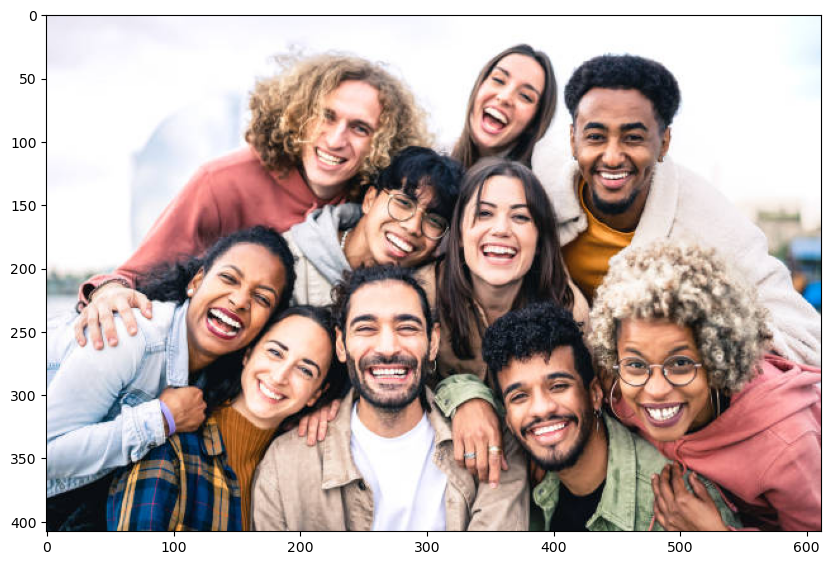

In [4]:
import matplotlib.pyplot as plt
img = plt.imread('7 new people.jpg') # geen .png, dan gaat het verderop mis
plt.figure(figsize=(10,8))
plt.imshow(img)

Welk datatype heeft de ingeladen afbeelding?

Hoe groot is de afbeelding in pixels?
Gebruik de code hieronder.

In [5]:
#print type and shape of image
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(408, 612, 3)


## 3. Multi-Task Convolutional Neural Network

In [6]:
#import the library. You can ignore a possible tensorflow warning
from mtcnn.mtcnn import MTCNN

from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import matplotlib.pyplot as plt

In [7]:
filename = '7 new people.jpg'
pixels = plt.imread(filename)
detector = MTCNN()
mtcnn_faces = detector.detect_faces(pixels)

print("Aantal gezichten: " + str(len(mtcnn_faces)))

3/3 [==============================] - 0s 9ms/step
Aantal gezichten: 11


In [8]:
#inspecteer het eerste gezicht. Wat wordt hier vastgelegd?
mtcnn_faces[0]

{'box': [358, 264, 69, 89],
 'confidence': 0.9999998807907104,
 'keypoints': {'left_eye': (373, 301),
  'right_eye': (404, 292),
  'nose': (391, 314),
  'mouth_left': (380, 329),
  'mouth_right': (414, 320)}}

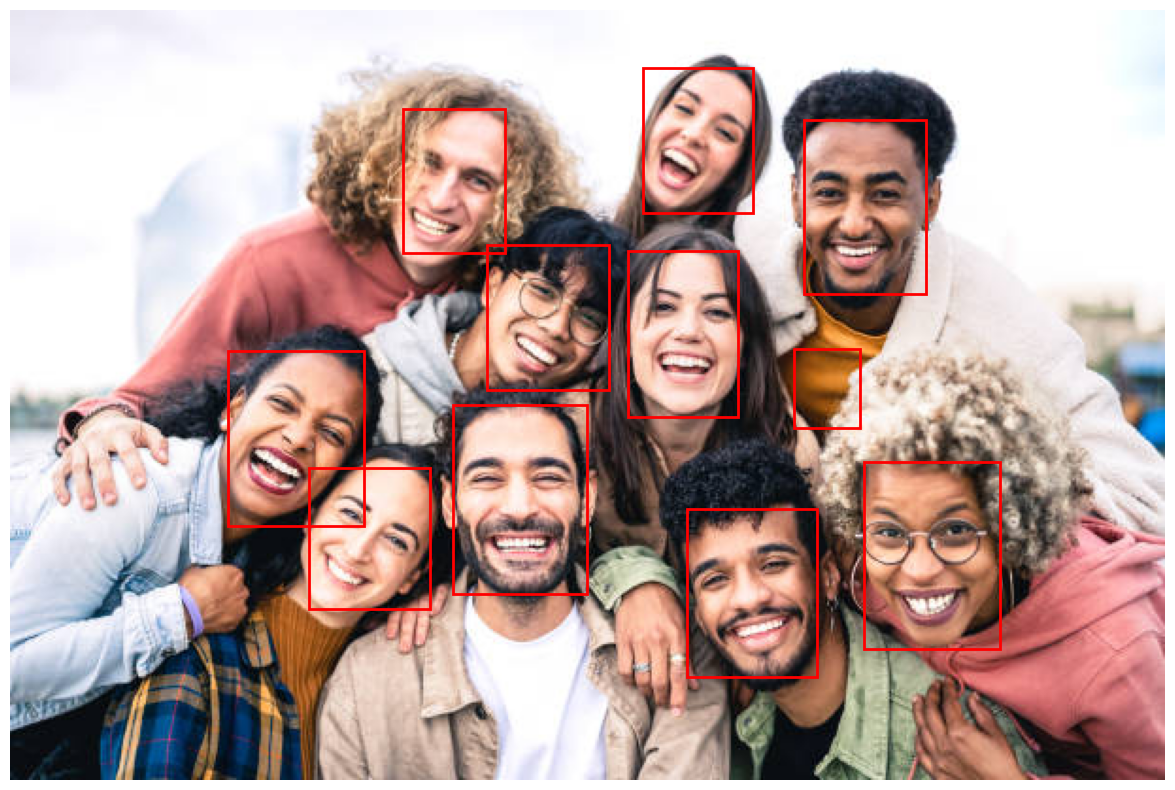

In [9]:
def draw_image_with_boxes(image, result_list):
    plt.figure(figsize=(15,10))
    plt.axis('off')
    plt.imshow(image)
    
    ax = plt.gca()
    
    for result in result_list:
        x, y, width, height = result['box']
        rect = Rectangle((x, y), width, height, fill=False, color='red',linewidth=2.0)
        ax.add_patch(rect)
        
    plt.show()


draw_image_with_boxes(pixels, mtcnn_faces)

**OPDRACHT**: 

Evalueer de verschillen tussen de Haar Cascade classifier, de CNN en wat je zelf ziet.

- Ik herken 10 van de 10 gezichten.
Ik als mens heb geen probleem met het identificeren van gezichten.
- Haar Cascade herkent 8 van de 10 gezichten
Cascade herektn 7 goeie gezichten, maar ook 1 fout gezich: een hand. Cascade heeft 3 gezichten gemist, deze gezichten waren vooral meer naar achter/onder andere gezichten waardoor Cascade geen goeie randen kon vinden op het gezicht. Ook heeft het blijkbaar een hand gedetecteerd wat raar is, dit laat zien hoe ouderwest dit algoritme is.
- CNN herkent 11 van de 10 gezichten
CNN herkent wel alle gezichten op de foto. Maar hij herkent ook een fout gezicht, namelijk kreukels in een shirt. Dit moedel is dus zo krachtig, dat hij soms complexe patronen herkent, die er niet eens zijn.


## Toon ook ogen, neus en mond

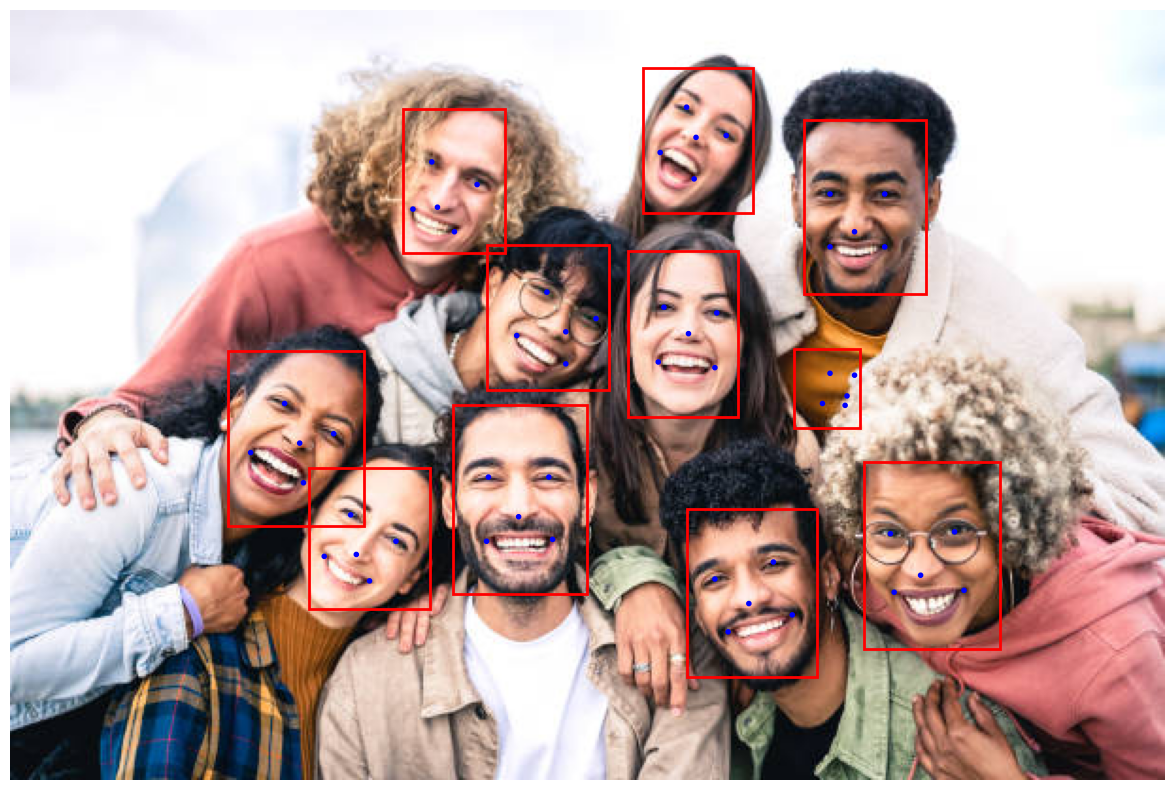

In [10]:
def draw_faces(image, result_list):
    plt.figure(figsize=(15,10))
    plt.axis('off')
    plt.imshow(image)
    
    ax = plt.gca()
    
    for result in result_list:
        x, y, width, height = result['box']
        rect = Rectangle((x, y), width, height, fill=False, color='red',linewidth=2.0)
        ax.add_patch(rect)
        
        for key, value in result['keypoints'].items():
            dot = Circle(value, radius=1.1, color='blue')
            ax.add_patch(dot)
            
    plt.show()

draw_faces(pixels, mtcnn_faces)

Deze Python-functie, `draw_faces`, wordt gebruikt om gezichten te detecteren en te markeren in een afbeelding met behulp van de resultaten van een Multi-task Cascaded Convolutional Networks (MTCNN) model. Hier is een stap-voor-stap uitleg van de code:

`plt.figure(figsize=(15,10))`: Dit maakt een nieuwe figuur aan met een specifieke grootte (15 bij 10 eenheden).

`plt.axis('off')`: Dit schakelt de assen uit, zodat alleen de afbeelding wordt weergegeven.

`plt.imshow(image)`: Dit toont de afbeelding op de figuur.

`ax = plt.gca()`: Dit haalt de huidige assen (gca staat voor 'get current axes') op, die worden gebruikt om vormen aan de figuur toe te voegen.

De for-lus gaat door elk resultaat in `result_list`, wat een lijst is van detecties door het MTCNN-model. Elke detectie is een woordenboek met een 'box' en 'keypoints'.

`x, y, width, height = result['box']`: Dit pakt de coördinaten en afmetingen van de bounding box van het gedetecteerde gezicht.

`rect = Rectangle((x, y), width, height, fill=False, color='red',linewidth=2.0)`: Dit maakt een rechthoek (de bounding box) met de gegeven coördinaten en afmetingen.

`ax.add_patch(rect)`: Dit voegt de rechthoek toe aan de figuur.

De binnenste for-lus gaat door de 'keypoints' in het resultaat, wat een woordenboek is van punten op het gezicht (zoals de ogen, neus en mond).

`dot = Circle(value, radius=1.1, color='blue')`: Dit maakt een cirkel op de locatie van elk keypoint.

`ax.add_patch(dot)`: Dit voegt de cirkel toe aan de figuur.

`plt.show()`: Dit toont de uiteindelijke figuur met de afbeelding, de bounding boxes en de keypoints.

# Afronding

Sla het ingevulde notebook op in je portfolio op GitLab - Minor Logboek AAI.
Maak een aantekening voor je Bloom tabel.